In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from math import sqrt,pi,sinh
%matplotlib notebook

In [35]:
class Cdata:
    
    '''
    .curve() - plots creep curve
    .plotss() - plots steady state creep
    .plotsst() - plots secondary and tertiary creep
    .plotpsize() - plots particle size and spacing
    .plotcmodelonly() - plots creep model outout
    .plotcreep() - plots secondary and tertiary creep data and creep model
    .plotcreepss() - plots secondary creep data and creep model
    '''

    def __init__(self, df, alloy, tem, stress,ssstart,ssend,A,C,rho,mech='climb'):
        #         self.tc = df.iloc[:,1:3]
        self.t = df.iloc[:, 1:2]
        self.c = df.iloc[:, 2:3] * 0.01
        self.tem = tem
        self.stress = stress
        self.mech = mech
        self.ssstart = ssstart
        self.ssend = ssend
        if alloy == 1:
            self.name = '263'
            self.style = '-'
        elif alloy == 2:
            self.name = 'Aged 263'
            self.style = '-.'
        else:
            self.name = '\u03B7'
            self.style = '--'
        self.calcss()
    
    def calcss(self):
        ''' 
        self.dfss - steady state
        self.dft - tertiary
        '''
        # Secodary
        self.dfss = pd.concat([self.t, self.c], axis=1)
        self.dfss.columns = ['time', 'strain']
        self.dfss = self.dfss[(self.dfss.time > self.ssstart)
                              & (self.dfss.time < self.ssend)]
#         print(f'Start {self.dfss.head(1)} end {self.dfss.tail(1)}')
        initime = self.dfss.time.iloc[0]
        inistr = self.dfss.strain.iloc[0]
        self.dfss.time = self.dfss.time - initime
        self.dfss.strain = self.dfss.strain - inistr

        # Tertiary
        self.dft = pd.concat([self.t, self.c], axis=1)
        self.dft.columns = ['time', 'strain']
        self.dft = self.dft[(self.dft.time > self.ssend)]

        self.dft.time = self.dft.time - initime
        self.dft.strain = self.dft.strain - inistr
        
    def plotcreep(self):
        plt.figure(figsize=(9, 9))
        plt.plot(self.t, self.c, linewidth=2.0, label="Creep data")
        plt.title(f'{self.name} {self.tem}C {self.stress}MPa', fontsize=14)
        plt.xlabel('Time (hrs)', fontsize=14)
        plt.ylabel('Strain', fontsize=14)
        plt.legend(loc="upper left")
        plt.grid(alpha = 0.4, linestyle='-')
        plt.show()
    
    def subplots(self):
        # Color
#         plt.plot(self.t, self.c, linewidth=2.0, label=f'{self.name} {self.tem}C {self.stress}MPa')
        
        label=f'{self.name}' #' {self.tem}C {self.stress}MPa'
        
#         # Creep curve
        plt.plot(self.t, self.c, linewidth=2.0,color='k', linestyle=self.style,label=label) #,dashes=(5, 10)
        
#         # Steady state for 800 125
#         line,=plt.plot(self.dfss.time,self.dfss.strain,linewidth=2.0,color='k', linestyle=self.style,label=label)
#         line.set_dashes([8, 6, 2, 6]) 
        
#         # Steady state
#         plt.plot(self.dfss.time,self.dfss.strain,linewidth=2.0,color='k', linestyle=self.style,label=label)
        

In [3]:
# sheet1 = pd.read_excel(open('Master creep data.xlsx', 'rb'), sheet_name='1. N263')
# sheet1.to_pickle('sheet1.pkl')
sheet1 = pd.read_pickle('sheet1.pkl')

A=1
C=1

In [36]:
gp700280 = Cdata(sheet1.iloc[15:, 3:5].dropna().reset_index(),1,700,280,350,750,A,C,5773,mech='shear')
gp700320 = Cdata(sheet1.iloc[15:, 9:11].dropna().reset_index(),1,700,320,50,160,A,C,14282,mech='shear') #50 170 100 140
gp700350 = Cdata(sheet1.iloc[15:, 6:8].dropna().reset_index(),1,700,350,50,300,A,C,10028,mech='shear')
gp700400 = Cdata(sheet1.iloc[15:, 21:23].dropna().reset_index(),1,700,400,10,70,A,C,95125,mech='shear')

gp750150 = Cdata(sheet1.iloc[15:, 18:20].dropna().reset_index(),1,750,150,500,2500,A,C,24211)
gp750180 = Cdata(sheet1.iloc[15:, 0:2].dropna().reset_index(),1,750,180,500,1500,A,C,30000)
gp750198 = Cdata(sheet1.iloc[15:, 12:14].dropna().reset_index(),1,750,198,130,300,A,C,53548)
gp750200 = Cdata(sheet1.iloc[15:, 15:17].dropna().reset_index(),1,750,200,550,1000,A,C,82000) # 53548 #tried 82000,74000


# gp700280 = Cdata(sheet1.iloc[15:, 3:5].dropna().reset_index(),1,700,280,mech='shear')
# gp700320 = Cdata(sheet1.iloc[15:, 9:11].dropna().reset_index(),1,700,320,mech='shear') #50 170 100 140
# gp700350 = Cdata(sheet1.iloc[15:, 6:8].dropna().reset_index(),1,700,350,mech='shear')
# gp700400 = Cdata(sheet1.iloc[15:, 21:23].dropna().reset_index(),1,700,400,mech='shear')

# gp750150 = Cdata(sheet1.iloc[15:, 18:20].dropna().reset_index(),1,750,150)
# gp750180 = Cdata(sheet1.iloc[15:, 0:2].dropna().reset_index(),1,750,180,500)
# gp750198 = Cdata(sheet1.iloc[15:, 12:14].dropna().reset_index(),1,750,198)
# gp750200 = Cdata(sheet1.iloc[15:, 15:17].dropna().reset_index(),1,750,200)

In [5]:
# sheet5 = pd.read_excel(open('Master creep data.xlsx', 'rb'), sheet_name='5. EPRI MTU')
# sheet5.to_pickle('sheet5.pkl')
sheet5 = pd.read_pickle('sheet5.pkl')

In [37]:
gp750300 = Cdata(sheet5.iloc[27:, 0:2].dropna().reset_index(),1,750,300,10,40,A,C,66760)
gp800100 = Cdata(sheet5.iloc[27:, 3:5].dropna().reset_index(),1,800,100,150,1400,A,C,6000)
gp800125 = Cdata(sheet5.iloc[27:, 6:8].dropna().reset_index(),1,800,125,150,800,A,C,6100)
gp800145 = Cdata(sheet5.iloc[27:, 9:11].dropna().reset_index(),1,800,145,2,4,A,C,6200) # Negative creep
gp800250 = Cdata(sheet5.iloc[27:, 42:44].dropna().reset_index(),1,800,250,4,15,A,C,500000)

gpe700325 = Cdata(sheet5.iloc[27:, 15:17].dropna().reset_index(),2,700,325,50,400,A,C,14282)
gpe700400 = Cdata(sheet5.iloc[27:, 18:20].dropna().reset_index(),2,700,400,20,140,A,C,95125)
gpe750200 = Cdata(sheet5.iloc[27:, 24:26].dropna().reset_index(),2,750,200,35,300,A,C,82000) #53548)
gpe750300 = Cdata(sheet5.iloc[27:, 27:29].dropna().reset_index(),2,750,300,20,100,A,C,66760)
gpe800100 = Cdata(sheet5.iloc[27:, 30:32].dropna().reset_index(),2,800,100,100,1100,A,C,6000)
gpe800125 = Cdata(sheet5.iloc[27:, 33:35].dropna().reset_index(),2,800,125,100,400,A,C,6100)
gpe800145 = Cdata(sheet5.iloc[27:, 36:38].dropna().reset_index(),2,800,145,30,200,A,C,6200) # Change this
# gpe800250old = Cdata(sheet5.iloc[27:, 39:41].dropna().reset_index(),2,800,250,1,5,A,C,500000)
# gpe800250 also old = Cdata(sheet5.iloc[27:, 45:47].dropna().reset_index(),2,800,250,4,42,A,C,500000)
gpe800250 = Cdata(sheet5.iloc[27:, 48:50].dropna().reset_index(),2,800,250,2,12,A,C,500000)


# gp750300 = Cdata(sheet5.iloc[27:, 0:2].dropna().reset_index(),1,750,300)
# gp800100 = Cdata(sheet5.iloc[27:, 3:5].dropna().reset_index(),1,800,100)
# gp800125 = Cdata(sheet5.iloc[27:, 6:8].dropna().reset_index(),1,800,125)
# gp800145 = Cdata(sheet5.iloc[27:, 9:11].dropna().reset_index(),1,800,145) # Negative creep
# gp800250 = Cdata(sheet5.iloc[27:, 42:44].dropna().reset_index(),1,800,250)

# gpe700325 = Cdata(sheet5.iloc[27:, 15:17].dropna().reset_index(),2,700,325)
# gpe700400 = Cdata(sheet5.iloc[27:, 18:20].dropna().reset_index(),2,700,400)
# gpe750200 = Cdata(sheet5.iloc[27:, 24:26].dropna().reset_index(),2,750,200)
# gpe750300 = Cdata(sheet5.iloc[27:, 27:29].dropna().reset_index(),2,750,300)
# gpe800100 = Cdata(sheet5.iloc[27:, 30:32].dropna().reset_index(),2,800,100)
# gpe800125 = Cdata(sheet5.iloc[27:, 33:35].dropna().reset_index(),2,800,125)
# gpe800145 = Cdata(sheet5.iloc[27:, 36:38].dropna().reset_index(),2,800,145) # Change this
# gpe800250 = Cdata(sheet5.iloc[27:, 45:47].dropna().reset_index(),2,800,250)

In [31]:
gpe800125 = Cdata(sheet5.iloc[27:, 33:35].dropna().reset_index(),2,800,125,100,400,A,C,6100)


In [7]:
# sheet2 = pd.read_excel(open('Master creep data.xlsx', 'rb'), sheet_name='2. WMTR')
# sheet2.to_pickle('sheet2.pkl')
sheet2 = pd.read_pickle('sheet2.pkl')
# sheet3 = pd.read_excel(open('Master creep data.xlsx', 'rb'), sheet_name='3. SE')
# sheet3.to_pickle('sheet3.pkl')
sheet3 = pd.read_pickle('sheet3.pkl')
# sheet4 = pd.read_excel(open('Master creep data.xlsx', 'rb'), sheet_name='4. EPRI')
# sheet4.to_pickle('sheet4.pkl')
sheet4 = pd.read_pickle('sheet4.pkl')

In [8]:
e700325_1 = Cdata(sheet4.iloc[24:, 0:2].dropna().reset_index(),3,700,325,5,75,A,C,10000)
e700325_2 = Cdata(sheet4.iloc[24:, 12:14].dropna().reset_index(),3,700,325,50,150,A,C,10000)
e700380 = Cdata(sheet4.iloc[24:, 36:38].dropna().reset_index(),3,700,380,10,40,A,C,10000)
e700400_1 = Cdata(sheet2.iloc[20:, 0:2].dropna().reset_index(),3,700,400,10,30,A,C,10000)
e700400_2 = Cdata(sheet2.iloc[20:, 12:14].dropna().reset_index(),3,700,400,10,30,A,C,10000)

e750125 = Cdata(sheet4.iloc[24:, 27:29].dropna().reset_index(),3,750,125,100,3800,A,C,10000)
e750160 = Cdata(sheet3.iloc[11:, 0:2].dropna().reset_index(),3,750,160,10,600,A,C,10000)
e750220 = Cdata(sheet4.iloc[24:, 3:5].dropna().reset_index(),3,750,220,5,100,A,C,10000)
e750275 = Cdata(sheet4.iloc[24:, 24:26].dropna().reset_index(),3,750,275,5,30,A,C,10000)
e750300_1 = Cdata(sheet2.iloc[20:, 3:5].dropna().reset_index(),3,750,300,5,20,A,C,10000)
e750300_2 = Cdata(sheet2.iloc[20:, 15:17].dropna().reset_index(),3,750,300,5,20,A,C,10000)

e800040 = Cdata(sheet4.iloc[24:, 15:17].dropna().reset_index(),3,800,40,500,4000,A,C,10000)
e800070 = Cdata(sheet3.iloc[11:, 3:5].dropna().reset_index(),3,800,70,250,1400,A,C,10000)
e800100_1 = Cdata(sheet3.iloc[11:, 6:8].dropna().reset_index(),3,800,100,200,600,A,C,10000)
e800100_2 = Cdata(sheet4.iloc[24:, 39:41].dropna().reset_index(),3,800,100,250,800,A,C,10000)
e800145_1 = Cdata(sheet4.iloc[24:, 6:8].dropna().reset_index(),3,800,145,100,200,A,C,10000)
e800145_2 = Cdata(sheet4.iloc[24:, 18:20].dropna().reset_index(),3,800,145,5,75,A,C,10000) # Incomplete
e800145_3 = Cdata(sheet4.iloc[24:, 21:23].dropna().reset_index(),3,800,145,5,75,A,C,10000)
e800206 = Cdata(sheet4.iloc[24:, 30:32].dropna().reset_index(),3,800,206,10,30,A,C,10000)
e800250_1 = Cdata(sheet2.iloc[20:, 6:8].dropna().reset_index(),3,800,250,4,12,A,C,10000)
e800250_2 = Cdata(sheet2.iloc[20:, 18:20].dropna().reset_index(),3,800,250,4,10,A,C,10000)


# e700325_1 = Cdata(sheet4.iloc[24:, 0:2].dropna().reset_index(),3,700,325)
# e700325_2 = Cdata(sheet4.iloc[24:, 12:14].dropna().reset_index(),3,700,325)
# e700380 = Cdata(sheet4.iloc[24:, 36:38].dropna().reset_index(),3,700,380)
# e700400_1 = Cdata(sheet2.iloc[20:, 0:2].dropna().reset_index(),3,700,400)
# e700400_2 = Cdata(sheet2.iloc[20:, 12:14].dropna().reset_index(),3,700,400)

# e750125 = Cdata(sheet4.iloc[24:, 27:29].dropna().reset_index(),3,750,125)
# e750160 = Cdata(sheet3.iloc[11:, 0:2].dropna().reset_index(),3,750,160)
# e750220 = Cdata(sheet4.iloc[24:, 3:5].dropna().reset_index(),3,750,220)
# e750275 = Cdata(sheet4.iloc[24:, 24:26].dropna().reset_index(),3,750,275)
# e750300_1 = Cdata(sheet2.iloc[20:, 3:5].dropna().reset_index(),3,750,300)
# e750300_2 = Cdata(sheet2.iloc[20:, 15:17].dropna().reset_index(),3,750,300)

# e800040 = Cdata(sheet4.iloc[24:, 15:17].dropna().reset_index(),3,800,40)
# e800070 = Cdata(sheet3.iloc[11:, 3:5].dropna().reset_index(),3,800,70)
# e800100_1 = Cdata(sheet3.iloc[11:, 6:8].dropna().reset_index(),3,800,100)
# e800100_2 = Cdata(sheet4.iloc[24:, 39:41].dropna().reset_index(),3,800,100)
# e800145_1 = Cdata(sheet4.iloc[24:, 6:8].dropna().reset_index(),3,800,145)
# e800145_2 = Cdata(sheet4.iloc[24:, 18:20].dropna().reset_index(),3,800,145)
# e800145_3 = Cdata(sheet4.iloc[24:, 21:23].dropna().reset_index(),3,800,145)
# e800206 = Cdata(sheet4.iloc[24:, 30:32].dropna().reset_index(),3,800,206)
# e800250_1 = Cdata(sheet2.iloc[20:, 6:8].dropna().reset_index(),3,800,250)
# e800250_2 = Cdata(sheet2.iloc[20:, 18:20].dropna().reset_index(),3,800,250)

# e850050 = Cdata(sheet3.iloc[11:, 9:11].dropna().reset_index(),3,850,50)
# e850060 = Cdata(sheet3.iloc[11:, 12:14].dropna().reset_index(),3,850,60)
# e850080 = Cdata(sheet4.iloc[24:, 9:11].dropna().reset_index(),3,850,80)
# e850125 = Cdata(sheet4.iloc[24:, 33:35].dropna().reset_index(),3,850,125)
# e850150_1 = Cdata(sheet2.iloc[20:, 9:11].dropna().reset_index(),3,850,150)
# e850150_2 = Cdata(sheet2.iloc[20:, 21:23].dropna().reset_index(),3,850,150)



<IPython.core.display.Javascript object>


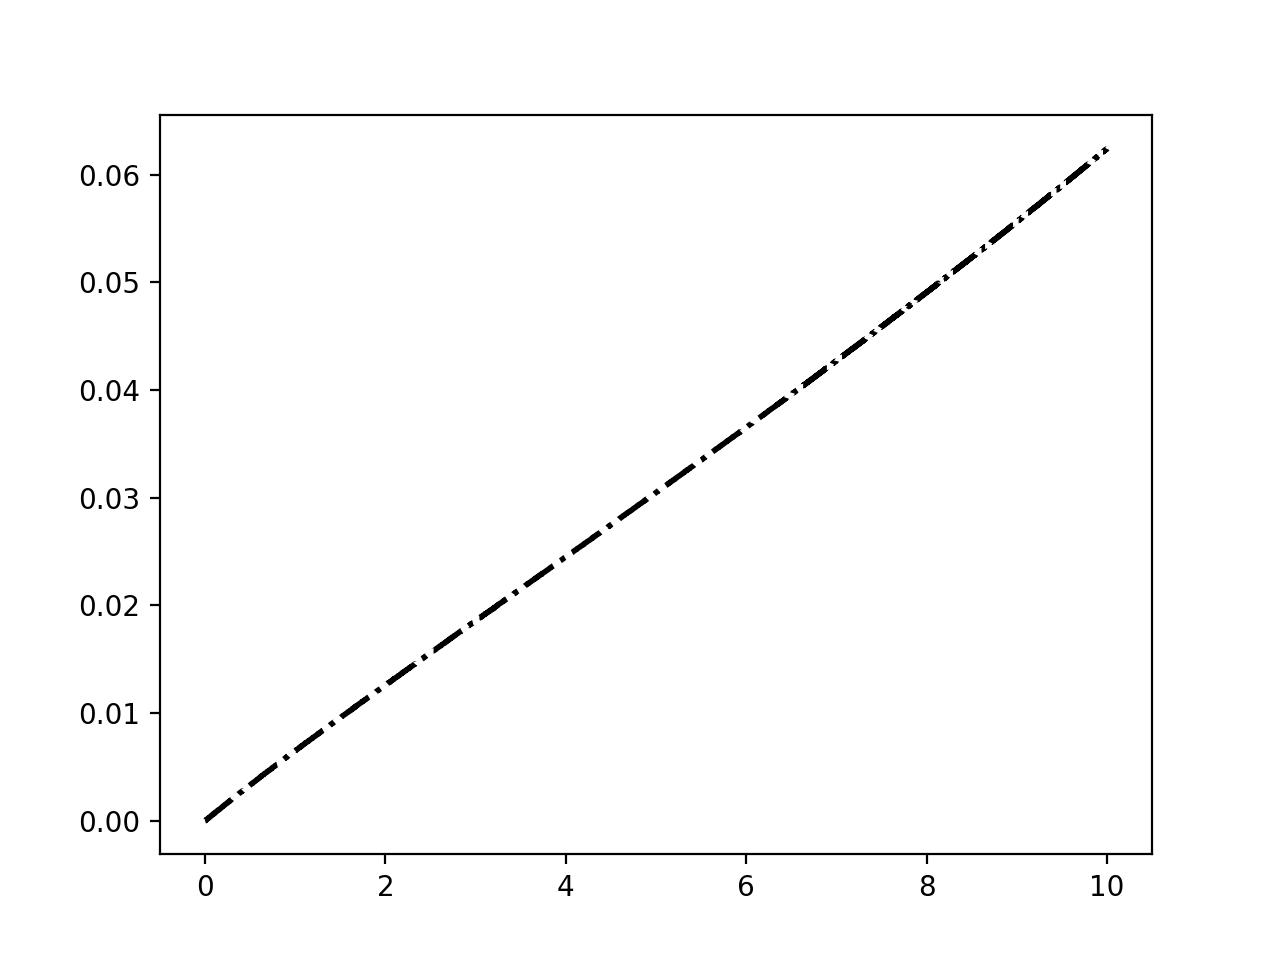

/Users/ninadmohale/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/ninadmohale/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/ninadmohale/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [40]:
%matplotlib widget
gpe800250.subplots()

/Users/ninadmohale/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/ninadmohale/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/ninadmohale/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


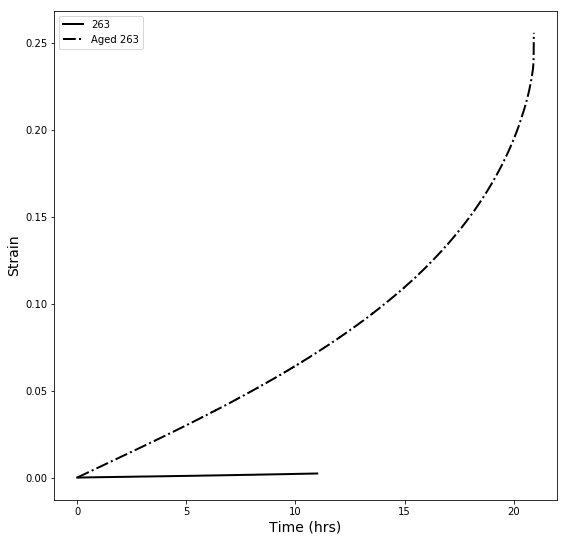

In [12]:
plt.figure(figsize=(9, 9))
plt.xlabel('Time (hrs)', fontsize=14)
plt.ylabel('Strain', fontsize=14)

# # By material
# gp700280.subplots()
# gp700320.subplots()
# gp700350.subplots()
# gp700400.subplots()

# gp750150.subplots()
# gp750180.subplots()
# gp750198.subplots()
# gp750200.subplots()
# gp750300.subplots()

# gp800100.subplots()
# gp800125.subplots()
# gp800145.subplots()
# gp800250.subplots()

# gpe700325.subplots()
# gpe700400.subplots()

# gpe750200.subplots()
# gpe750300.subplots()

# gpe800100.subplots()
# gpe800125.subplots()
# gpe800145.subplots()
# gpe800250.subplots()

# # By Temperature - Stress

# gp700280.subplots()

# gp700320.subplots()
# gpe700325.subplots()

# gp700350.subplots()

# gp700400.subplots()
# gpe700400.subplots()

# gp750150.subplots()

# gp750180.subplots()

# gp750198.subplots()

# gp750200.subplots()
# gpe750200.subplots()

# gp750300.subplots()
# gpe750300.subplots()

# gp800100.subplots()
# gpe800100.subplots()

# gp800125.subplots()
# gpe800125.subplots()

# gp800145.subplots()
# gpe800145.subplots()

# gp800250.subplots()
# gpe800250.subplots()


plt.legend(loc="upper left")



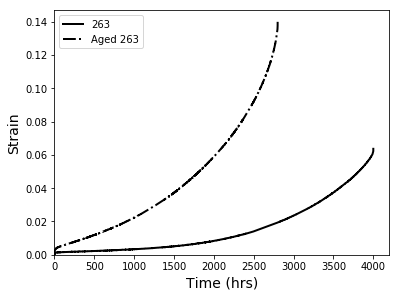

In [38]:
# gp, gpe, e

plt.figure(figsize=(6,4.5)) # (16,12)) # (6,4.5))
plt.xlabel('Time (hrs)', fontsize=14)
plt.ylabel('Strain', fontsize=14)


# # By Temperature - Stress

# gp700280.subplots()

# testname = 'b1'
# gp700320.subplots()
# gpe700325.subplots()
# e700325_1.subplots()
# # e700325_2.subplots()

# gp700350.subplots()
# e700380.subplots()

# testname = 'b2'
# gp700400.subplots()
# gpe700400.subplots()
# e700400_1.subplots()
# e700400_2.subplots()


# gp750150.subplots()
# e750160.subplots()

# gp750180.subplots()

# gp750198.subplots()

# testname = 'b3'
# gp750200.subplots()
# gpe750200.subplots()
# e750220.subplots()

# testname = 'b4'
# gp750300.subplots()
# gpe750300.subplots()
# e750300_1.subplots()
# e750300_2.subplots()

# testname = 'b5'
# gp800100.subplots()
# gpe800100.subplots()
# e800100_1.subplots()
# e800100_2.subplots()

testname = 'b6'
gp800125.subplots()
gpe800125.subplots()
# e800145_3.subplots()

# testname = 'b7'
# gp800145.subplots()
# gpe800145.subplots()
# e800145_1.subplots() # Most complete curve
# e800145_2.subplots() # Overlap of this curve

# testname = 'b8'
# gp800250.subplots()
# gpe800250.subplots()
# e800250_1.subplots()
# # e800250_2.subplots()

plt.xlim((0, None))
plt.ylim((0, None))
plt.legend(loc="upper left")

pltflag = True
if pltflag:
    plt.savefig(testname)

In [52]:
testname = 
plt.savefig(testname)

### Sensitivity Analysis

Choosing gp only 800C 100Mpa for sensitivity analysis